In [1]:
import talib as ta
import numpy as np 
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

#forex = pd.read_csv("../Data/EURUSD2014_2018.csv").set_index('date')


In [2]:
forex = quandl.get("CHRIS/CME_ES2")[:5391]

forex.shape

(5391, 8)

In [3]:
forex.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2018-10-31,2695.75,2743.50,2688.0,2711.75,26.25,2717.25,17983.0,179205.0
2018-11-01,2712.00,2747.50,2712.0,2739.75,27.00,2744.25,15278.0,183675.0
2018-11-02,2729.75,2772.00,2706.0,2729.00,13.75,2730.50,7704.0,187543.0
2018-11-05,2728.50,2749.75,2719.5,2746.25,15.00,2745.50,8313.0,188455.0
2018-11-06,2744.25,2766.75,2736.0,2764.25,19.75,2765.25,10449.0,189396.0


In [4]:
forex['EMA10'] = ta.EMA(np.asarray(forex['Settle']), 10)
forex['EMA30'] = ta.EMA(np.asarray(forex['Settle']), 30)
forex['ATR'] = ta.ATR(np.asarray(forex['High']), np.asarray(forex['Low']), np.asarray(forex['Settle']), timeperiod=14)
forex['ADX'] = ta.ADX(np.asarray(forex['High']), np.asarray(forex['Low']), np.asarray(forex['Settle']), timeperiod=14)
forex['RSI'] = ta.RSI(np.asarray(forex['Settle']), timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(np.asarray(forex['Settle']), fastperiod=12, slowperiod=26, signalperiod=9)
forex['MACD'] = macd
forex['MACDsignal'] = macdsignal

forex.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,,,
2018-10-31,2695.75,2743.50,2688.0,2711.75,26.25,2717.25,17983.0,179205.0,2719.251104,2791.221805,52.532264,44.897281,39.627535,-52.804738,-45.404407
2018-11-01,2712.00,2747.50,2712.0,2739.75,27.00,2744.25,15278.0,183675.0,2723.796358,2788.191366,51.315673,44.659069,44.274745,-47.682210,-45.859967
2018-11-02,2729.75,2772.00,2706.0,2729.00,13.75,2730.50,7704.0,187543.0,2725.015202,2784.469342,52.364554,43.562351,42.481353,-44.222313,-45.532436
2018-11-05,2728.50,2749.75,2719.5,2746.25,15.00,2745.50,8313.0,188455.0,2728.739711,2781.955191,50.784943,42.543971,45.094181,-39.811028,-44.388155
2018-11-06,2744.25,2766.75,2736.0,2764.25,19.75,2765.25,10449.0,189396.0,2735.377945,2780.877437,49.353876,40.996696,48.416732,-34.325707,-42.375665


In [5]:
forex['ClgtEMA10'] = np.where(forex['Settle'] > forex['EMA10'], 1, -1)
forex['EMA10gtEMA30'] = np.where(forex['EMA10'] > forex['EMA30'], 1, -1)
forex['MACDSIGgtMACD'] = np.where(forex['MACDsignal'] > forex['MACD'], 1, -1)
forex.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,
2018-10-31,2695.75,2743.50,2688.0,2711.75,26.25,2717.25,17983.0,179205.0,2719.251104,2791.221805,52.532264,44.897281,39.627535,-52.804738,-45.404407,-1,-1,1
2018-11-01,2712.00,2747.50,2712.0,2739.75,27.00,2744.25,15278.0,183675.0,2723.796358,2788.191366,51.315673,44.659069,44.274745,-47.682210,-45.859967,1,-1,1
2018-11-02,2729.75,2772.00,2706.0,2729.00,13.75,2730.50,7704.0,187543.0,2725.015202,2784.469342,52.364554,43.562351,42.481353,-44.222313,-45.532436,1,-1,-1
2018-11-05,2728.50,2749.75,2719.5,2746.25,15.00,2745.50,8313.0,188455.0,2728.739711,2781.955191,50.784943,42.543971,45.094181,-39.811028,-44.388155,1,-1,-1
2018-11-06,2744.25,2766.75,2736.0,2764.25,19.75,2765.25,10449.0,189396.0,2735.377945,2780.877437,49.353876,40.996696,48.416732,-34.325707,-42.375665,1,-1,-1


## Decision Tree

First the classification DT. It will predict if the market goes up or down. It lags return, as in the algorithm will predict what happened the next day based on the present.

In [6]:
forex['Return'] = forex['Settle'].pct_change(1).shift(-1)
forex['target_cls'] = np.where(forex.Return > 0, 1, 0)
forex.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls
Date,,,,,,,,,,,,,,,,,,,,
2018-10-31,2695.75,2743.50,2688.0,2711.75,26.25,2717.25,17983.0,179205.0,2719.251104,2791.221805,52.532264,44.897281,39.627535,-52.804738,-45.404407,-1,-1,1,0.009937,1
2018-11-01,2712.00,2747.50,2712.0,2739.75,27.00,2744.25,15278.0,183675.0,2723.796358,2788.191366,51.315673,44.659069,44.274745,-47.682210,-45.859967,1,-1,1,-0.005010,0
2018-11-02,2729.75,2772.00,2706.0,2729.00,13.75,2730.50,7704.0,187543.0,2725.015202,2784.469342,52.364554,43.562351,42.481353,-44.222313,-45.532436,1,-1,-1,0.005493,1
2018-11-05,2728.50,2749.75,2719.5,2746.25,15.00,2745.50,8313.0,188455.0,2728.739711,2781.955191,50.784943,42.543971,45.094181,-39.811028,-44.388155,1,-1,-1,0.007194,1
2018-11-06,2744.25,2766.75,2736.0,2764.25,19.75,2765.25,10449.0,189396.0,2735.377945,2780.877437,49.353876,40.996696,48.416732,-34.325707,-42.375665,1,-1,-1,NaN,0


In [7]:
featuresList =  ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = forex[featuresList][27:]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2018-10-31,52.532264,44.897281,39.627535,-1,-1,1
2018-11-01,51.315673,44.659069,44.274745,1,-1,1
2018-11-02,52.364554,43.562351,42.481353,1,-1,-1
2018-11-05,50.784943,42.543971,45.094181,1,-1,-1
2018-11-06,49.353876,40.996696,48.416732,1,-1,-1


In [18]:
y_cls = forex.target_cls[27:]


In [19]:
X_trainset_cls, X_testset_cls, y_trainset_cls, y_testset_cls = train_test_split(X, y_cls, test_size=0.3, random_state=432)

In [20]:
print(y_trainset_cls.shape, X_trainset_cls.shape)
print(y_testset_cls.shape, X_testset_cls.shape)

(3754,) (3754, 6)
(1610,) (1610, 6)


In [21]:
forexTree = DecisionTreeClassifier(criterion="gini", max_depth = 3, min_samples_leaf=6)
forexTree.fit(X_trainset_cls,y_trainset_cls)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predTree = forexTree.predict(X_testset_cls)

In [23]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset_cls, predTree))

DecisionTrees's Accuracy:  0.5329192546583851


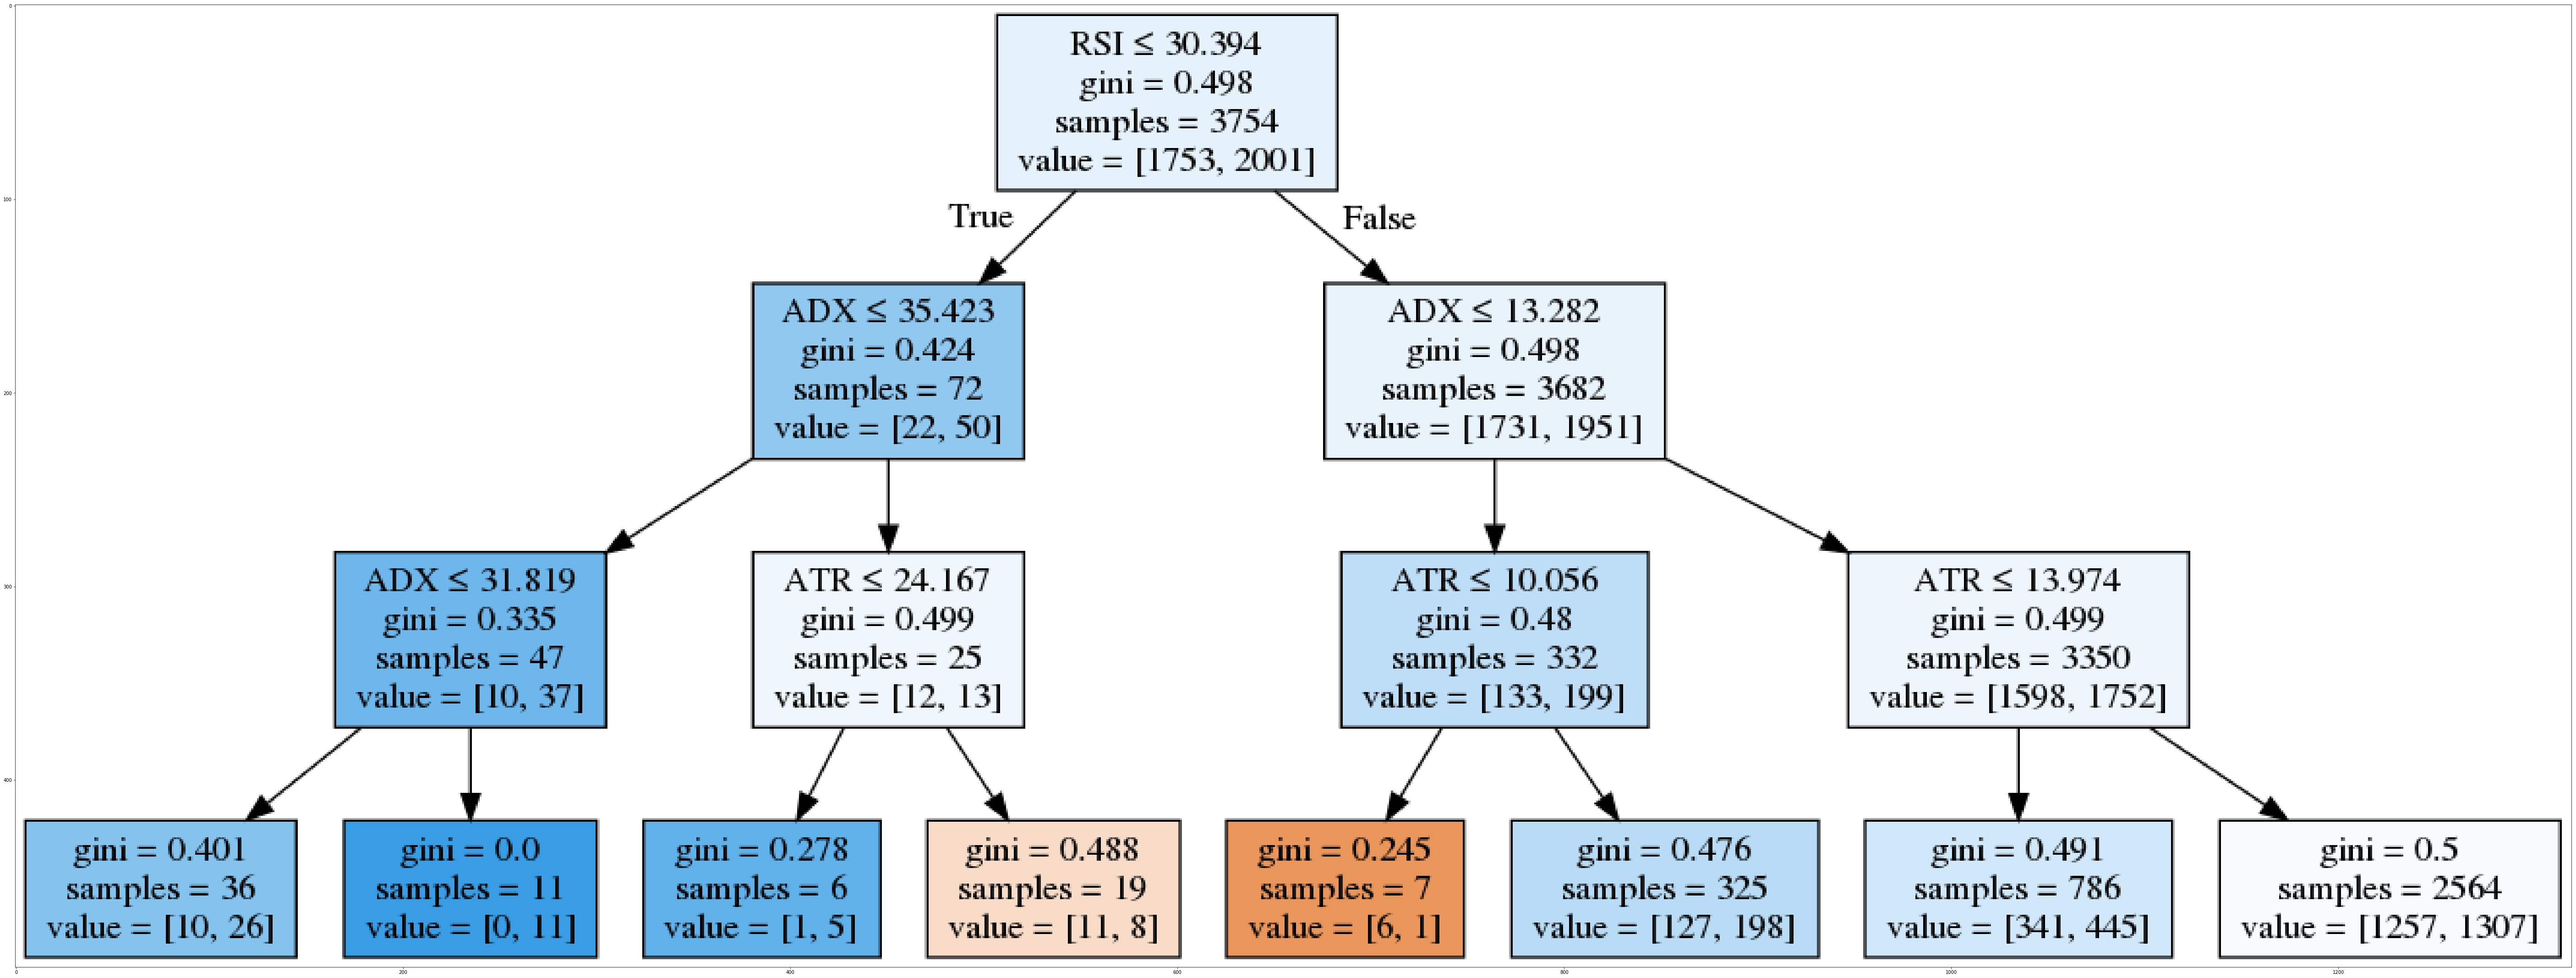

In [24]:
dot_data = StringIO()
filename = "quantinst_tree.png"
featureNames = featuresList
# targetNames = df["Hipov"].unique().tolist()
out=tree.export_graphviz(forexTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_testset_cls, predTree)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.01      0.02       751
           1       0.53      0.99      0.69       859

   micro avg       0.53      0.53      0.53      1610
   macro avg       0.50      0.50      0.36      1610
weighted avg       0.50      0.53      0.38      1610

